**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using Seattle Data Set**




### Imports and Mount File Directories


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "Seattle_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [73]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [74]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [75]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [76]:
pip install --upgrade mlxtend


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [77]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
#from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [78]:
download_file = ("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name))

In [79]:

#!wget -nc $download_file

In [80]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
#df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,3089.0,2722.0,1109.0,122125.0,559300.0,41507.0,1072.0,280.0,2298.0,715.0,172.0,83.0,43.0,1179.0,0.0,0.0,1024.0,85.0,1944.0,49190.0,136.0,0.0,10.0,16.0,0.0,17.0,22.0,25.0,46.0,130.0,12.0,50.0,0.0,53,61,52113,0.0,39.0,17.0,0.0,...,0,1,1,0,0,1,0,1,0,0,53061052113,0,False,0,0,0,1.0,1.0,0,0,0,0,0,1,477.459391,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
1,5717.0,4602.0,2139.0,72821.0,252400.0,24503.0,1287.0,140.0,4026.0,515.0,173.0,0.0,0.0,2186.0,0.0,31.0,1526.0,613.0,1263.0,34576.0,316.0,48.0,49.0,18.0,96.0,24.0,50.0,0.0,31.0,49.0,0.0,0.0,0.0,53,61,52904,24.0,0.0,0.0,0.0,...,0,1,1,0,0,1,0,1,0,0,53061052904,0,True,1,0,0,1.0,0.0,0,1,0,0,1,1,155.368987,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
2,5373.0,3444.0,1954.0,152222.0,634900.0,26642.0,3135.0,360.0,3868.0,1426.0,639.0,183.0,75.0,1974.0,0.0,0.0,1753.0,201.0,2487.0,58262.0,184.0,27.0,0.0,0.0,19.0,29.0,16.0,30.0,63.0,124.0,0.0,10.0,8.0,53,61,42005,10.0,26.0,0.0,0.0,...,1,0,1,0,0,0,1,0,1,0,53061042005,0,False,0,0,0,1.0,1.0,0,0,0,0,1,0,-1494.174303,20.207763,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
3,2587.0,2214.0,929.0,86635.0,353200.0,22272.0,1385.0,402.0,1828.0,329.0,71.0,18.0,0.0,970.0,23.0,157.0,756.0,173.0,1626.0,39929.0,188.0,9.0,6.0,36.0,78.0,0.0,52.0,5.0,2.0,46.0,20.0,0.0,0.0,53,61,52504,0.0,2.0,19.0,0.0,...,0,1,1,1,0,1,0,0,1,1,53061052504,0,False,0,0,0,1.0,0.0,0,0,0,0,0,1,132.526306,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
4,4916.0,3637.0,1837.0,100586.0,445700.0,31173.0,1402.0,175.0,3524.0,966.0,487.0,167.0,73.0,1967.0,27.0,13.0,1527.0,310.0,1546.0,40813.0,226.0,44.0,50.0,0.0,1.0,49.0,20.0,0.0,62.0,257.0,18.0,53.0,0.0,53,61,51918,0.0,13.0,51.0,33.0,...,0,1,1,0,0,1,0,1,0,0,53061051918,0,False,0,0,0,1.0,0.0,0,0,0,0,1,1,306.403888,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
5,4309.0,3944.0,1723.0,74255.0,397800.0,35693.0,1427.0,359.0,3212.0,570.0,165.0,52.0,34.0,1781.0,131.0,67.0,1389.0,334.0,1680.0,35484.0,275.0,49.0,29.0,41.0,15.0,66.0,0.0,0.0,75.0,124.0,19.0,10.0,43.0,53,61,53201,26.0,0.0,8.0,0.0,...,0,0,1,0,0,1,0,0,0,1,53061053201,0,False,0,0,0,1.0,1.0,0,0,0,0,1,0,1.204856,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
6,7413.0,3925.0,2542.0,60714.0,197300.0,18005.0,1369.0,76.0,5079.0,694.0,162.0,57.0,0.0,2946.0,286.0,1589.0,1466.0,1076.0,1413.0,32887.0,494.0,60.0,37.0,98.0,78.0,121.0,45.0,16.0,39.0,221.0,39.0,0.0,0.0,53,53,62500,27.0,21.0,79.0,0.0,...,0,0,0,0,1,0,0,0,0,1,53053062500,0,False,1,1,1,0.0,0.0,0,0,0,0,1,0,-248.551850,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
7,3292.0,1454.0,1172.0,52240.0,209600.0,16794.0,1142.0,110.0,2031.0,238.0,55.0,12.0,0.0,1283.0,211.0,415.0,610.0,562.0,1258.0,31550.0,128.0,22.0,0.0,0.0,14.0,30.0,27.0,14.0,21.0,37.0,5.0,5.0,16.0,53,53,63000,0.0,5.0,0.0,6.0,...,1,0,0,0,0,0,0,0,0,1,53053063000,0,False,1,1,1,0.0,1.0,0,0,0,0,1,0,-9

In [81]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [82]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [83]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
53061052113,0.193854,0.217980,0.588166,0.0,1.0,0.0,0.0,0.0,0.0,0.134225,0.243338,0.622438,0.0,1.0,0.0,0.0,0.0,0.0,0.073304,0.134225,0.193854,0.042133,0.085212,0.118809,0.073896,0.063455,0.076646,0.379870,0.672727,aff_mix_mod,0.368522,-0.043796,0,1,0,0,0,0,1,0,...,-0.292857,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,0,False,1.0,1.0,0,1,0,7.0
53061052904,0.473768,0.232011,0.294221,0.0,0.0,0.0,0.0,1.0,0.0,0.396551,0.222959,0.380489,0.0,0.0,0.0,0.0,1.0,0.0,0.249365,0.396551,0.473768,0.064145,0.143121,0.195032,0.478915,0.257743,0.286583,0.522425,0.534268,aff_mix_mod,0.074706,-0.035391,0,1,0,0,0,0,1,0,...,-0.011842,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,True,1.0,0.0,1,1,0,7.0
53061042005,0.174057,0.132720,0.693224,0.0,1.0,0.0,0.0,0.0,0.0,0.138894,0.115820,0.745286,0.0,1.0,0.0,0.0,0.0,0.0,0.010194,0.138894,0.174057,0.125094,0.234845,0.359017,0.156207,0.033939,0.102866,0.216719,0.526077,aff_mix_mod,0.380638,0.534959,0,0,0,1,0,0,1,0,...,-0.309358,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,False,1.0,1.0,1,0,0,6.0
53061052504,0.354614,0.300848,0.344538,0.0,0.0,0.0,0.0,1.0,0.0,0.174221,0.249141,0.576638,0.0,1.0,0.0,0.0,0.0,0.0,0.181542,0.174221,0.354614,0.030527,0.057568,0.144182,0.178838,0.140044,0.186222,0.592333,0.605354,aff_mix_mod,0.331313,-0.063955,1,0,0,0,0,0,1,0,...,-0.013021,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,False,1.0,0.0,0,1,0,7.0
53061051918,0.375988,0.124089,0.499923,0.0,0.0,0.0,0.0,1.0,0.0,0.328554,0.141483,0.529963,0.0,0.0,0.0,0.0,0.0,1.0,0.142666,0.328554,0.375988,0.057740,0.154369,0.260171,0.081814,0.218142,0.168753,0.416142,0.457966,aff_mix_mod,0.307339,0.071300,0,0,1,0,0,0,1,0,...,-0.041823,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,False,1.0,0.0,1,1,0,7.0
53061053201,0.440755,0.189433,0.369812,0.0,0.0,0.0,0.0,1.0,0.0,0.343690,0.232850,0.423460,0.0,0.0,0.0,0.0,1.0,0.0,0.198195,0.343690,0.440755,0.030184,0.056456,0.084706,0.214247,0.264684,0.193848,0.539656,0.680389,aff_mix_mod,0.370585,0.092256,0,0,1,0,0,0,1,0,...,-0.140733,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,False,1.0,1.0,1,0,0,7.0
53053062500,0.557999,0.198831,0.243170,1.0,0.0,0.0,0.0,0.0,0.0,0.533688,0.250811,0.215501,0.0,0.0,0.0,1.0,0.0,0.0,0.344945,0.533688,0.557999,0.224829,0.335181,0.470525,0.383010,0.329091,0.423289,0.439566,0.562885,aff_mix_mod,0.326690,0.0

Correlation Heatmap

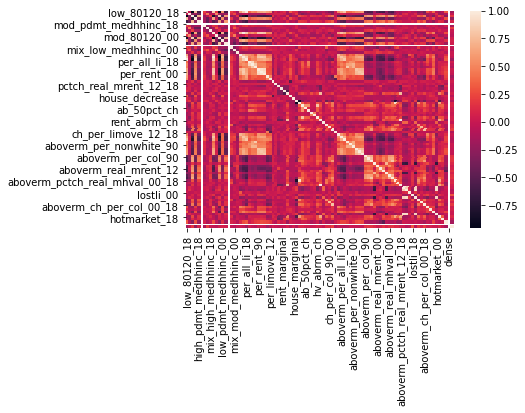

In [84]:
import seaborn as sns

sns.heatmap(df2.corr())

In [85]:
#df2.corr()['inc80_18'] > 0.9


In [86]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [87]:
to_drop

['high_80120_18',
 'high_80120_00',
 'per_all_li_00',
 'per_all_li_18',
 'aboverm_pctch_real_mrent_12_18']

In [88]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [89]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [90]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [91]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [92]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [93]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [94]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [95]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [96]:
confidence_cut = 0.8
lift_cut = 1.0
conviction_cut = 0.8
support_cut = 0.65

# Associaton Rules Analysis - Gentrified

In [97]:
gent_class = 'gent'

In [98]:

df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [99]:
df_class = df_class.astype(bool)


In [100]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

26 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_90)
3 itemset(s) from tree conditioned on items (ab_50pct_ch)
7 itemset(s) from tree conditioned on items (lmh_flag_category_aff_mix_mod)
4 itemset(s) from tree conditioned on items (per_all_li_90_dummy_VH)
0 itemset(s) from tree conditioned on items (per_all_li_90_dummy_VH, aboverm_per_rent_90)
1 itemset(s) from tree conditioned on items (per_all_li_90_dummy_VH, aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (per_all_li_90_dummy_VH, lmh_flag_category_aff_mix_mod)
7 itemset(s) from tree conditioned on items (per_all_li_90_dummy_VH, ab_50pct_ch)
5 itemset(s) from tree conditioned on items (dp_PChRent)
0 itemset(s) from tree conditioned on items (dp_PChRent, aboverm_per_rent_90)
1 itemset(s) from tree conditioned on items (dp_PChRent, aboverm_per_all_li_90)
3 itemset(s) from tree conditioned o

In [101]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [102]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [103]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [104]:
frequent_itemsets.head(10)

,support,itemsets
0,1.00,(aboverm_per_all_li_90)
1,1.00,(aboverm_per_rent_90)
2,0.95,(ab_50pct_ch)
3,0.90,(lmh_flag_category_aff_mix_mod)
4,0.90,(per_all_li_90_dummy_VH)
5,0.90,(dp_PChRent)
6,0.90,(aboverm_per_nonwhite_90)
7,0.85,(aboverm_per_nonwhite_00)
8,0.80,(aboverm_per_all_li_00)
9,0.80,(aboverm_per_all_li_18)


In [105]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_rent_90),(aboverm_per_all_li_90),1.00,1.00,1.00,1.00,1.0,0.0,inf
1,(aboverm_per_all_li_90),(aboverm_per_rent_90),1.00,1.00,1.00,1.00,1.0,0.0,inf
2,(aboverm_per_rent_90),(ab_50pct_ch),1.00,0.95,0.95,0.95,1.0,0.0,1.0
3,(ab_50pct_ch),(aboverm_per_rent_90),0.95,1.00,0.95,1.00,1.0,0.0,inf
4,(aboverm_per_all_li_90),(ab_50pct_ch),1.00,0.95,0.95,0.95,1.0,0.0,1.0
5,(ab_50pct_ch),(aboverm_per_all_li_90),0.95,1.00,0.95,1.00,1.0,0.0,inf
6,"(aboverm_per_rent_90, aboverm_per_all_li_90)",(ab_50pct_ch),1.00,0.95,0.95,0.95,1.0,0.0,1.0
7,"(aboverm_per_rent_90, ab_50pct_ch)",(aboverm_per_all_li_90),0.95,1.00,0.95,1.00,1.0,0.0,inf
8,"(ab_50pct_ch, aboverm_per_all_li_90)",(aboverm_per_rent_90),0.95,1.00,0.95,1.00,1.0,0.0,inf
9,(aboverm_per_rent_90),"(ab_50pct_ch, aboverm_per_all_li_90)",1.00,0.95,0.95,0.95,1.0,0.0,1.0


In [106]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [107]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [108]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_rent_90),(aboverm_per_all_li_90),1.00,1.00,1.00,1.00,1.000000,0.0000,inf
1,(aboverm_per_all_li_90),(aboverm_per_rent_90),1.00,1.00,1.00,1.00,1.000000,0.0000,inf
2,(aboverm_per_rent_90),(ab_50pct_ch),1.00,0.95,0.95,0.95,1.000000,0.0000,1.0
3,(ab_50pct_ch),(aboverm_per_rent_90),0.95,1.00,0.95,1.00,1.000000,0.0000,inf
4,(aboverm_per_all_li_90),(ab_50pct_ch),1.00,0.95,0.95,0.95,1.000000,0.0000,1.0
...,...,...,...,...,...,...,...,...,...
2315271,"(aboverm_per_nonwhite_90, aboverm_per_nonwhite...","(aboverm_per_nonwhite_00, aboverm_per_rent_90,...",0.65,0.85,0.65,1.00,1.176471,0.0975,inf
2315272,"(aboverm_per_nonwhite_00, aboverm_per_nonwhite...","(aboverm_per_rent_90, aboverm_per_nonwhite_90,...",0.65,0.90,0.65,1.00,1.111111,0.0650,inf
2315273,"(aboverm_per_rent_90, aboverm_per_nonwhite_18)","(aboverm_per_nonwhite_00, aboverm_per_nonwhite...",0.65,0.85,0.65,1.00,1.176471,0.0975,inf
2315274,"(aboverm_per_all_li_90, aboverm_per_nonwhite_18)","(aboverm_per_nonwhite_00, aboverm_per_rent_90,...",0.65,0.85,0.65,1.00,1.176471,0.0975,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [109]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_rent_90),(aboverm_per_all_li_90),1.00,1.0,1.00,1.0,1.0,0.0,inf
1,(aboverm_per_all_li_90),(aboverm_per_rent_90),1.00,1.0,1.00,1.0,1.0,0.0,inf
3,(ab_50pct_ch),(aboverm_per_rent_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
5,(ab_50pct_ch),(aboverm_per_all_li_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
7,"(aboverm_per_rent_90, ab_50pct_ch)",(aboverm_per_all_li_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
8,"(aboverm_per_all_li_90, ab_50pct_ch)",(aboverm_per_rent_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
11,(ab_50pct_ch),"(aboverm_per_rent_90, aboverm_per_all_li_90)",0.95,1.0,0.95,1.0,1.0,0.0,inf
12,(lmh_flag_category_aff_mix_mod),(aboverm_per_rent_90),0.90,1.0,0.90,1.0,1.0,0.0,inf
14,(lmh_flag_category_aff_mix_mod),(aboverm_per_all_li_90),0.90,1.0,0.90,1.0,1.0,0.0,inf
18,"(lmh_flag_category_aff_mix_mod, aboverm_per_al...",(aboverm_per_rent_90),0.90,1.0,0.90,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [110]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_rent_90),(aboverm_per_all_li_90),1.00,1.0,1.00,1.0,1.0,0.0,inf
1,(aboverm_per_all_li_90),(aboverm_per_rent_90),1.00,1.0,1.00,1.0,1.0,0.0,inf
3,(ab_50pct_ch),(aboverm_per_rent_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
5,(ab_50pct_ch),(aboverm_per_all_li_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
7,"(aboverm_per_rent_90, ab_50pct_ch)",(aboverm_per_all_li_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
8,"(aboverm_per_all_li_90, ab_50pct_ch)",(aboverm_per_rent_90),0.95,1.0,0.95,1.0,1.0,0.0,inf
11,(ab_50pct_ch),"(aboverm_per_rent_90, aboverm_per_all_li_90)",0.95,1.0,0.95,1.0,1.0,0.0,inf
12,(lmh_flag_category_aff_mix_mod),(aboverm_per_rent_90),0.90,1.0,0.90,1.0,1.0,0.0,inf
14,(lmh_flag_category_aff_mix_mod),(aboverm_per_all_li_90),0.90,1.0,0.90,1.0,1.0,0.0,inf
18,"(lmh_flag_category_aff_mix_mod, aboverm_per_al...",(aboverm_per_rent_90),0.90,1.0,0.90,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [111]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
332606,"(aboverm_per_nonwhite_00, aboverm_per_units_pr...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332609,"(hotmarket_18, aboverm_per_rent_00)","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332987,"(aboverm_per_nonwhite_00, aboverm_per_nonwhite...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332989,"(hotmarket_18, aboverm_per_nonwhite_90, abover...","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332996,"(aboverm_per_nonwhite_00, aboverm_per_units_pr...","(hotmarket_18, aboverm_per_nonwhite_90, abover...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332998,"(hotmarket_18, aboverm_per_rent_00)","(aboverm_per_nonwhite_00, aboverm_per_nonwhite...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
333698,"(aboverm_per_nonwhite_00, aboverm_per_all_li_0...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
333700,"(hotmarket_18, aboverm_per_all_li_00, aboverm_...","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
333707,"(aboverm_per_nonwhite_00, aboverm_per_units_pr...","(hotmarket_18, aboverm_per_all_li_00, aboverm_...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
333709,"(hotmarket_18, aboverm_per_rent_00)","(aboverm_per_nonwhite_00, aboverm_per_all_li_0...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf


In [112]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
332606,"(aboverm_per_nonwhite_00, aboverm_per_units_pr...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332609,"(hotmarket_18, aboverm_per_rent_00)","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332987,"(aboverm_per_nonwhite_00, aboverm_per_nonwhite...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332989,"(hotmarket_18, aboverm_per_nonwhite_90, abover...","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
332996,"(aboverm_per_nonwhite_00, aboverm_per_units_pr...","(hotmarket_18, aboverm_per_nonwhite_90, abover...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
...,...,...,...,...,...,...,...,...,...
338670,"(hotmarket_18, aboverm_per_rent_00)","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
338696,"(aboverm_per_nonwhite_00, aboverm_per_rent_90,...","(hotmarket_18, aboverm_per_rent_00)",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
338699,"(aboverm_per_rent_00, aboverm_per_rent_90, abo...","(aboverm_per_nonwhite_00, aboverm_per_units_pr...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf
338708,"(aboverm_per_nonwhite_00, aboverm_per_all_li_0...","(aboverm_per_rent_00, aboverm_per_rent_90, hot...",0.65,0.65,0.65,1.0,1.538462,0.2275,inf


Plot Metrics

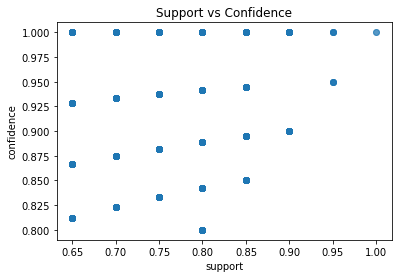

In [113]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

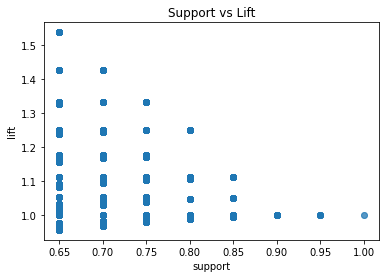

In [114]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

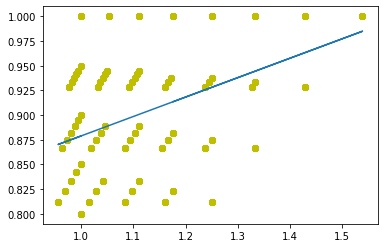

In [115]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [116]:
gent_class = 'nongent'

In [117]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [118]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

21 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_18)
3 itemset(s) from tree conditioned on items (low_80120_18_dummy_VH)
0 itemset(s) from tree conditioned on items (low_80120_18_dummy_VH, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (low_80120_18_dummy_VH, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (low_80120_18_dummy_VH, aboverm_per_rent_18)
4 itemset(s) from tree conditioned on items (per_all_li_18_dummy_VH)
0 itemset(s) from tree conditioned on items (per_all_li_18_dummy_VH, low_80120_18_dummy_VH)
1 itemset(s) from tree conditioned on items (per_all_li_18_dummy_VH, aboverm_per_all_li_18)
3 itemset(s) from tree conditioned on items (per_all_li_18_dummy_VH, aboverm_per_all_li_00)
7 itemset(s) from tree conditioned on items (per_all_li_18_dummy_V

In [119]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [120]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [121]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.969543,0.969543,0.969543,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.969543,1.000000,0.969543,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.903553,0.903553,0.903553,1.000000,0.000000,1.000000
3,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.903553,1.000000,0.903553,1.000000,1.000000,0.000000,inf
4,(aboverm_per_rent_18),(aboverm_per_all_li_00),0.903553,0.969543,0.893401,0.988764,1.019825,0.017367,2.710660
5,(aboverm_per_all_li_00),(aboverm_per_rent_18),0.969543,0.903553,0.893401,0.921466,1.019825,0.017367,1.228088
6,"(aboverm_per_all_li_18, aboverm_per_rent_18)",(aboverm_per_all_li_00),0.903553,0.969543,0.893401,0.988764,1.019825,0.017367,2.710660
7,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(aboverm_per_rent_18),0.969543,0.903553,0.893401,0.921466,1.019825,0.017367,1.228088
8,"(aboverm_per_rent_18, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.893401,1.000000,0.893401,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_rent_18, aboverm_per_all_li_00)",1.000000,0.893401,0.893401,0.893401,1.000000,0.000000,1.000000


In [122]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [123]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [124]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.969543,0.969543,0.969543,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.969543,1.000000,0.969543,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.903553,0.903553,0.903553,1.000000,0.000000,1.000000
3,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.903553,1.000000,0.903553,1.000000,1.000000,0.000000,inf
4,(aboverm_per_rent_18),(aboverm_per_all_li_00),0.903553,0.969543,0.893401,0.988764,1.019825,0.017367,2.710660
5,(aboverm_per_all_li_00),(aboverm_per_rent_18),0.969543,0.903553,0.893401,0.921466,1.019825,0.017367,1.228088
6,"(aboverm_per_all_li_18, aboverm_per_rent_18)",(aboverm_per_all_li_00),0.903553,0.969543,0.893401,0.988764,1.019825,0.017367,2.710660
7,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(aboverm_per_rent_18),0.969543,0.903553,0.893401,0.921466,1.019825,0.017367,1.228088
8,"(aboverm_per_rent_18, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.893401,1.000000,0.893401,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_rent_18, aboverm_per_all_li_00)",1.000000,0.893401,0.893401,0.893401,1.000000,0.000000,1.000000


In [125]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.969543,0.969543,0.969543,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.969543,1.000000,0.969543,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.903553,0.903553,0.903553,1.000000,0.000000,1.000000
3,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.903553,1.000000,0.903553,1.000000,1.000000,0.000000,inf
4,(aboverm_per_rent_18),(aboverm_per_all_li_00),0.903553,0.969543,0.893401,0.988764,1.019825,0.017367,2.710660
...,...,...,...,...,...,...,...,...,...
67270,(presence_ph_LIHTC),(aboverm_per_all_li_18),0.664975,1.000000,0.664975,1.000000,1.000000,0.000000,inf
67271,(presence_ph_LIHTC),(aboverm_per_all_li_00),0.664975,0.969543,0.659898,0.992366,1.023540,0.015177,3.989848
67272,"(presence_ph_LIHTC, aboverm_per_all_li_18)",(aboverm_per_all_li_00),0.664975,0.969543,0.659898,0.992366,1.023540,0.015177,3.989848
67273,"(presence_ph_LIHTC, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.659898,1.000000,0.659898,1.000000,1.000000,0.000000,inf


In [126]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56115,"(per_all_li_18_dummy_VH, aboverm_per_rent_90, ...","(per_all_li_00_dummy_VH, low_80120_18_dummy_VH...",0.670051,0.675127,0.670051,1.0,1.481203,0.217681,inf
56118,"(aboverm_per_rent_90, low_80120_18_dummy_VH, l...","(per_all_li_18_dummy_VH, per_all_li_00_dummy_V...",0.670051,0.675127,0.670051,1.0,1.481203,0.217681,inf
56128,"(per_all_li_18_dummy_VH, aboverm_per_rent_90, ...","(low_80120_00_dummy_VH, low_80120_18_dummy_VH,...",0.670051,0.675127,0.670051,1.0,1.481203,0.217681,inf
56131,"(aboverm_per_rent_90, low_80120_18_dummy_VH, p...","(per_all_li_18_dummy_VH, low_80120_00_dummy_VH...",0.670051,0.675127,0.670051,1.0,1.481203,0.217681,inf
57101,"(per_all_li_18_dummy_VH, aboverm_per_rent_90, ...","(per_all_li_00_dummy_VH, low_80120_18_dummy_VH...",0.670051,0.675127,0.670051,1.0,1.481203,0.217681,inf
...,...,...,...,...,...,...,...,...,...
53878,"(aboverm_per_rent_90, aboverm_per_rent_18, per...","(low_80120_00_dummy_VH, aboverm_per_all_li_00,...",0.680203,0.695431,0.680203,1.0,1.437956,0.207168,inf
53910,"(aboverm_per_rent_90, aboverm_per_all_li_18, a...","(per_all_li_00_dummy_VH, aboverm_per_rent_00)",0.680203,0.695431,0.680203,1.0,1.437956,0.207168,inf
53916,"(aboverm_per_rent_90, aboverm_per_all_li_18, a...","(low_80120_00_dummy_VH, aboverm_per_rent_00)",0.680203,0.695431,0.680203,1.0,1.437956,0.207168,inf
53923,"(aboverm_per_rent_90, aboverm_per_rent_18, low...","(per_all_li_00_dummy_VH, aboverm_per_all_li_18...",0.680203,0.695431,0.680203,1.0,1.437956,0.207168,inf


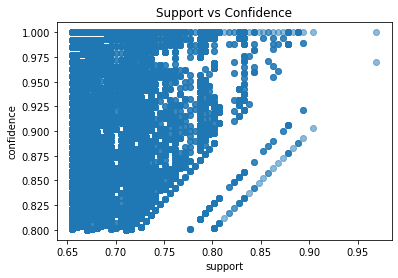

In [127]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

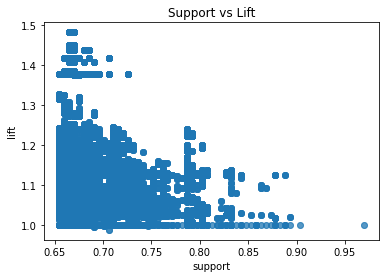

In [128]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

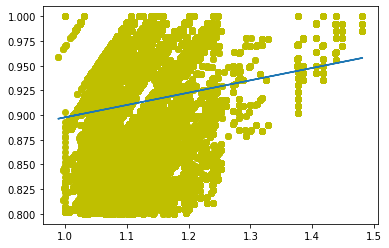

In [129]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [130]:
gent_class = 'exclusive'

In [131]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [132]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

7 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (ab_50pct_ch)
2 itemset(s) from tree conditioned on items (aboverm_real_mrent_00)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, ab_50pct_ch)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, dp_PChRent)
0 itemset(s) from tree conditioned on items (house_increase)
1 itemset(s) from tree conditioned on items (aboverm_real_mhval_00)
1 itemset(s) from tree conditioned on items (change_flag_category_ch_increase)
1 itemset(s) from tree conditioned on items (dp_PChRent)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_12)


In [133]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [134]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [135]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.774038,0.894231,0.697115,0.900621,1.007146,0.004946,1.064303
1,(aboverm_real_mrent_00),(dp_PChRent),0.774038,0.841346,0.653846,0.844720,1.004011,0.002612,1.021731
2,(aboverm_real_mhval_00),(ab_50pct_ch),0.701923,0.894231,0.673077,0.958904,1.072323,0.045396,2.573718
3,(change_flag_category_ch_increase),(house_increase),0.697115,0.735577,0.682692,0.979310,1.331350,0.169910,12.780449
4,(house_increase),(change_flag_category_ch_increase),0.735577,0.697115,0.682692,0.928105,1.331350,0.169910,4.212850
5,(ab_50pct_ch),(dp_PChRent),0.894231,0.841346,0.778846,0.870968,1.035207,0.026489,1.229567
6,(dp_PChRent),(ab_50pct_ch),0.841346,0.894231,0.778846,0.925714,1.035207,0.026489,1.423817


In [136]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [137]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [138]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.774038,0.894231,0.697115,0.900621,1.007146,0.004946,1.064303
1,(aboverm_real_mrent_00),(dp_PChRent),0.774038,0.841346,0.653846,0.844720,1.004011,0.002612,1.021731
2,(aboverm_real_mhval_00),(ab_50pct_ch),0.701923,0.894231,0.673077,0.958904,1.072323,0.045396,2.573718
3,(change_flag_category_ch_increase),(house_increase),0.697115,0.735577,0.682692,0.979310,1.331350,0.169910,12.780449
4,(house_increase),(change_flag_category_ch_increase),0.735577,0.697115,0.682692,0.928105,1.331350,0.169910,4.212850
5,(ab_50pct_ch),(dp_PChRent),0.894231,0.841346,0.778846,0.870968,1.035207,0.026489,1.229567
6,(dp_PChRent),(ab_50pct_ch),0.841346,0.894231,0.778846,0.925714,1.035207,0.026489,1.423817


In [139]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.774038,0.894231,0.697115,0.900621,1.007146,0.004946,1.064303
1,(aboverm_real_mrent_00),(dp_PChRent),0.774038,0.841346,0.653846,0.844720,1.004011,0.002612,1.021731
2,(aboverm_real_mhval_00),(ab_50pct_ch),0.701923,0.894231,0.673077,0.958904,1.072323,0.045396,2.573718
3,(change_flag_category_ch_increase),(house_increase),0.697115,0.735577,0.682692,0.979310,1.331350,0.169910,12.780449
4,(house_increase),(change_flag_category_ch_increase),0.735577,0.697115,0.682692,0.928105,1.331350,0.169910,4.212850
5,(ab_50pct_ch),(dp_PChRent),0.894231,0.841346,0.778846,0.870968,1.035207,0.026489,1.229567
6,(dp_PChRent),(ab_50pct_ch),0.841346,0.894231,0.778846,0.925714,1.035207,0.026489,1.423817


In [140]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(change_flag_category_ch_increase),(house_increase),0.697115,0.735577,0.682692,0.979310,1.331350,0.169910,12.780449
4,(house_increase),(change_flag_category_ch_increase),0.735577,0.697115,0.682692,0.928105,1.331350,0.169910,4.212850
2,(aboverm_real_mhval_00),(ab_50pct_ch),0.701923,0.894231,0.673077,0.958904,1.072323,0.045396,2.573718
6,(dp_PChRent),(ab_50pct_ch),0.841346,0.894231,0.778846,0.925714,1.035207,0.026489,1.423817
5,(ab_50pct_ch),(dp_PChRent),0.894231,0.841346,0.778846,0.870968,1.035207,0.026489,1.229567
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.774038,0.894231,0.697115,0.900621,1.007146,0.004946,1.064303
1,(aboverm_real_mrent_00),(dp_PChRent),0.774038,0.841346,0.653846,0.844720,1.004011,0.002612,1.021731
